<a href="https://colab.research.google.com/github/Saiakash1508/ML-Projects/blob/main/weather_changing_patterens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Necessary Libraries**:

**Pandas (pd)**: A powerful library for data manipulation and analysis, particularly with tabular data.

**NumPy (np)**: A library for numerical operations, particularly useful for handling arrays and mathematical functions.

**Matplotlib (plt**): A plotting library for creating static, animated, and interactive visualizations.

**Seaborn (sns)**: A statistical data visualization library built on Matplotlib, providing a high-level interface for drawing attractive graphs.

**Datetime**: A module for manipulating dates and times.

**LinearRegression**: A class from scikit-learn for performing linear regression analysis.

**UnivariateSpline**: A class from SciPy for smoothing and interpolating data using spline functions.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
from scipy.interpolate import UnivariateSpline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

** Load the Dataset:**
Reads the CSV file daily_data.csv into a Pandas DataFrame called data.

In [32]:
data = pd.read_csv("daily_data.csv")


In [33]:
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2474 entries, 0 to 2473
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time                   2474 non-null   object 
 1   temperature_2m (°C)    2474 non-null   float64
 2   precipitation (mm)     2474 non-null   float64
 3   rain (mm)              2474 non-null   float64
 4   cloudcover (%)         2474 non-null   float64
 5   cloudcover_low (%)     2474 non-null   float64
 6   cloudcover_mid (%)     2474 non-null   float64
 7   cloudcover_high (%)    2474 non-null   float64
 8   windspeed_10m (km/h)   2474 non-null   float64
 9   winddirection_10m (°)  2474 non-null   float64
 10  rain_moving_avg        2474 non-null   float64
dtypes: float64(10), object(1)
memory usage: 212.7+ KB
None
       temperature_2m (°C)  precipitation (mm)    rain (mm)  cloudcover (%)  \
count          2474.000000         2474.000000  2474.000000     2474.000000   

In [34]:
data['time'] = pd.to_datetime(data['time'], format='%Y-%m-%d')
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day_of_year'] = data['time'].dt.dayofyear


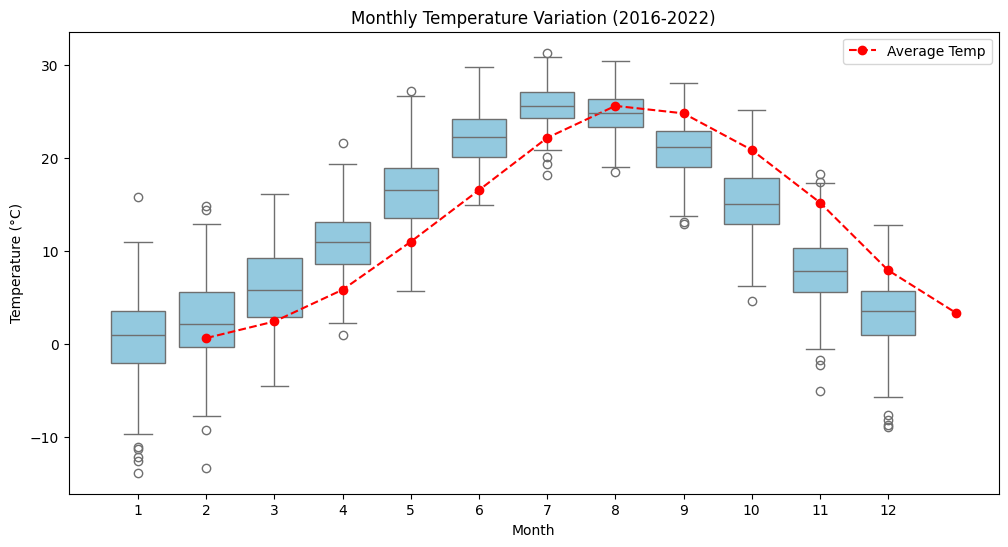

In [35]:
monthly_avg_temp = data.groupby('month')['temperature_2m (°C)'].mean()
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['month'], y=data['temperature_2m (°C)'], color='skyblue')
plt.plot(monthly_avg_temp, color='red', linestyle='--', marker='o', label="Average Temp")
plt.title("Monthly Temperature Variation (2016-2022)")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


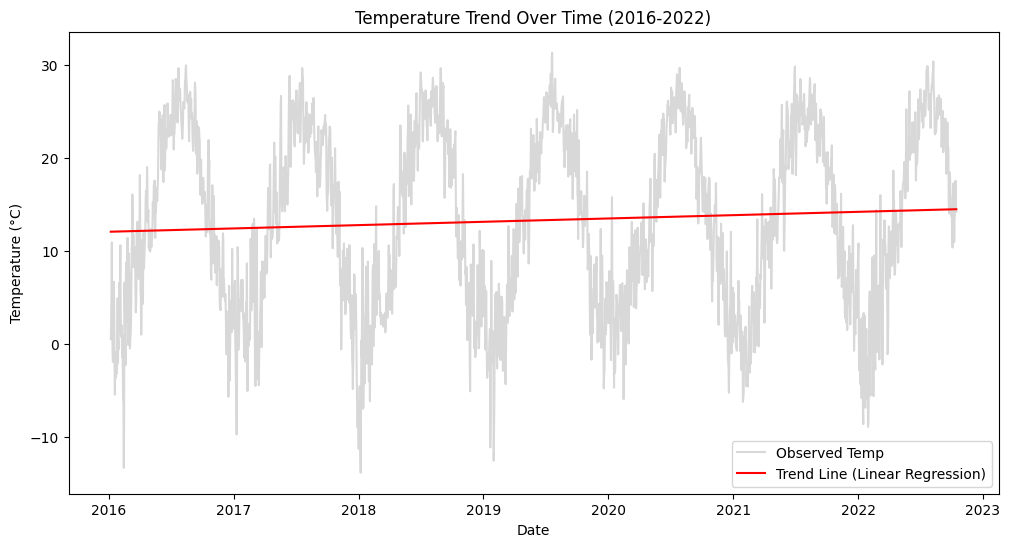

In [36]:
data['time_ordinal'] = data['time'].map(datetime.toordinal)
X = data[['time_ordinal']]
y = data['temperature_2m (°C)']
reg = LinearRegression().fit(X, y)
data['temp_trend'] = reg.predict(X)

plt.figure(figsize=(12, 6))
plt.plot(data['time'], data['temperature_2m (°C)'], color='gray', alpha=0.3, label="Observed Temp")
plt.plot(data['time'], data['temp_trend'], color='red', label="Trend Line (Linear Regression)")
plt.title("Temperature Trend Over Time (2016-2022)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


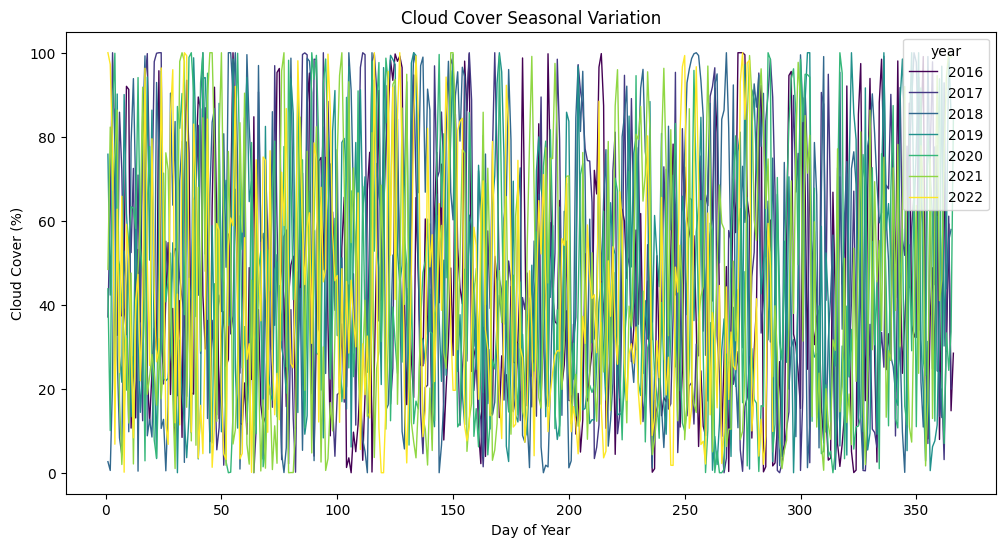

In [37]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='day_of_year', y='cloudcover (%)', hue='year', palette="viridis", linewidth=1)
plt.title("Cloud Cover Seasonal Variation")
plt.xlabel("Day of Year")
plt.ylabel("Cloud Cover (%)")
plt.show()


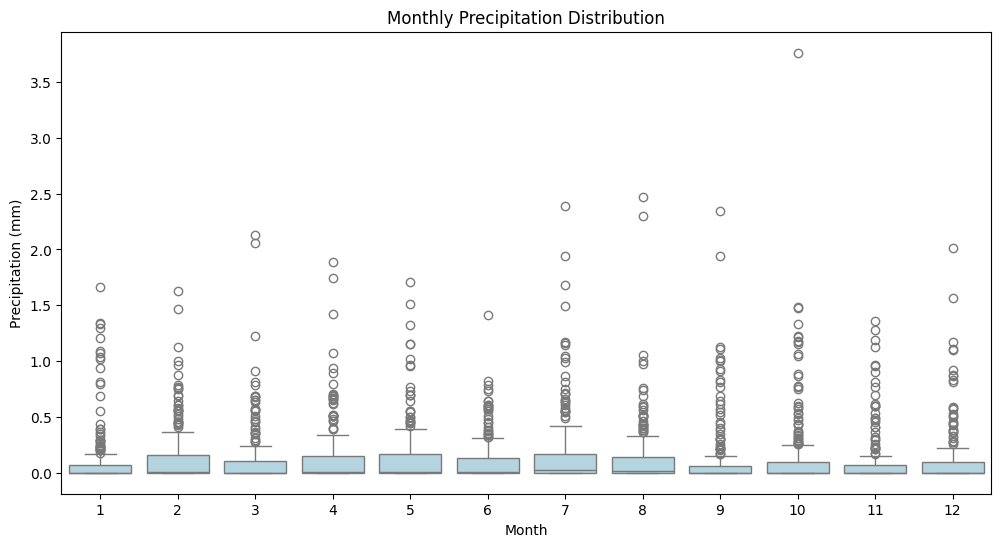

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['month'], y=data['precipitation (mm)'], color="lightblue")
plt.title("Monthly Precipitation Distribution")
plt.xlabel("Month")
plt.ylabel("Precipitation (mm)")
plt.show()


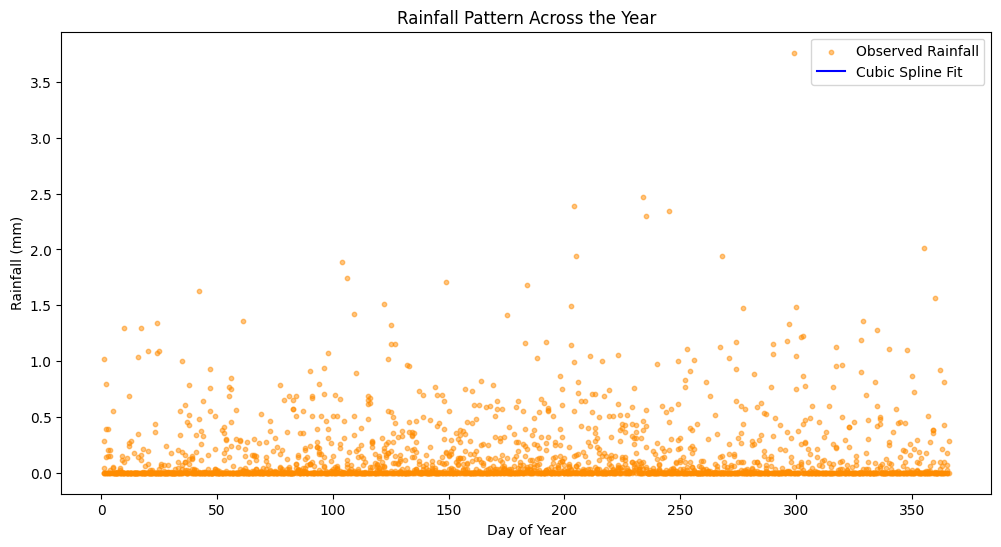

In [39]:
# Ensure data is sorted by 'day_of_year'
sorted_data = data.sort_values(by='day_of_year')

# Prepare days for spline fitting
days = np.linspace(sorted_data['day_of_year'].min(), sorted_data['day_of_year'].max(), 300)

# Fit the cubic spline to the sorted data
spline = UnivariateSpline(sorted_data['day_of_year'], sorted_data['rain (mm)'], s=0.05)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.scatter(sorted_data['day_of_year'], sorted_data['rain (mm)'], color="darkorange", s=10, alpha=0.5, label="Observed Rainfall")
plt.plot(days, spline(days), color="blue", label="Cubic Spline Fit")
plt.title("Rainfall Pattern Across the Year")
plt.xlabel("Day of Year")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.show()


In [40]:
# Prepare the feature set and target variable
data['time_ordinal'] = data['time'].map(datetime.toordinal)  # Convert datetime to ordinal for regression
X = data[['time_ordinal', 'cloudcover (%)', 'precipitation (mm)', 'windspeed_10m (km/h)']]
y = data['temperature_2m (°C)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can tune n_estimators
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [41]:
y_pred = model.predict(X_test)

In [42]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 10.84
R-squared: 0.87


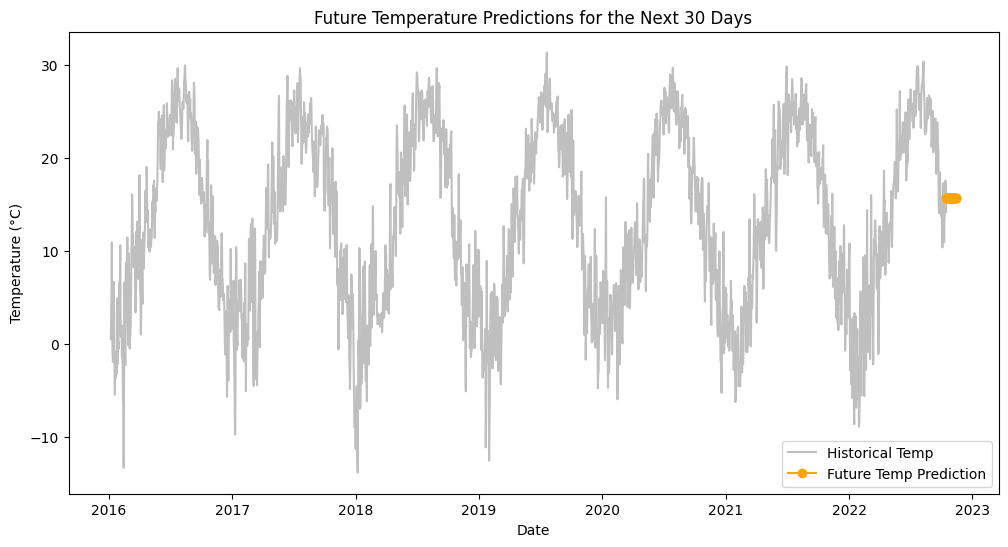

In [43]:
from datetime import timedelta
# Forecast future weather (e.g., for the next 30 days)
last_date = data['time'].max()
future_dates = [last_date + timedelta(days=i) for i in range(1, 31)]
future_ordinal = [date.toordinal() for date in future_dates]

# Create a DataFrame for future predictions
future_df = pd.DataFrame({
    'time_ordinal': future_ordinal,
    'cloudcover (%)': np.mean(data['cloudcover (%)']),  # Average cloud cover from historical data
    'precipitation (mm)': np.mean(data['precipitation (mm)']),  # Average precipitation from historical data
    'windspeed_10m (km/h)': np.mean(data['windspeed_10m (km/h)'])  # Average wind speed from historical data
})

# Make predictions for future dates
future_predictions = model.predict(future_df)

# Visualize the predictions
plt.figure(figsize=(12, 6))
plt.plot(data['time'], data['temperature_2m (°C)'], color='gray', alpha=0.5, label="Historical Temp")
plt.plot(future_dates, future_predictions, color='orange', label="Future Temp Prediction", marker='o')
plt.title("Future Temperature Predictions for the Next 30 Days")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

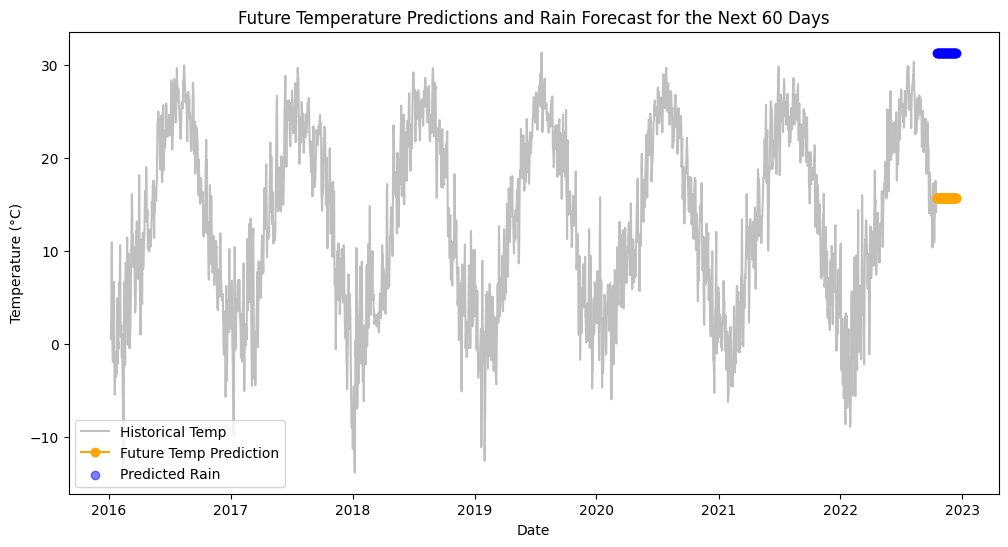

In [44]:
# Forecast future weather (e.g., for the next 60 days)
last_date = data['time'].max()
future_dates = [last_date + timedelta(days=i) for i in range(1, 61)]  # Predict for the next 60 days
future_ordinal = [date.toordinal() for date in future_dates]

# Create a DataFrame for future predictions
future_df = pd.DataFrame({
    'time_ordinal': future_ordinal,
    'cloudcover (%)': np.mean(data['cloudcover (%)']),
    'precipitation (mm)': np.mean(data['precipitation (mm)']),
    'windspeed_10m (km/h)': np.mean(data['windspeed_10m (km/h)'])
})

# Make predictions for future dates
future_temp_predictions = model.predict(future_df)

# Assuming a threshold for rain (e.g., if precipitation > 0.1 mm, it will rain)
future_rain_predictions = future_df['precipitation (mm)'].apply(lambda x: 1 if x > 0.1 else 0)

# Visualize the predictions
plt.figure(figsize=(12, 6))
plt.plot(data['time'], data['temperature_2m (°C)'], color='gray', alpha=0.5, label="Historical Temp")
plt.plot(future_dates, future_temp_predictions, color='orange', label="Future Temp Prediction", marker='o')

# Plot future rain predictions
plt.scatter(future_dates, future_rain_predictions * max(data['temperature_2m (°C)']), color='blue', label="Predicted Rain", alpha=0.5)

plt.title("Future Temperature Predictions and Rain Forecast for the Next 60 Days")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


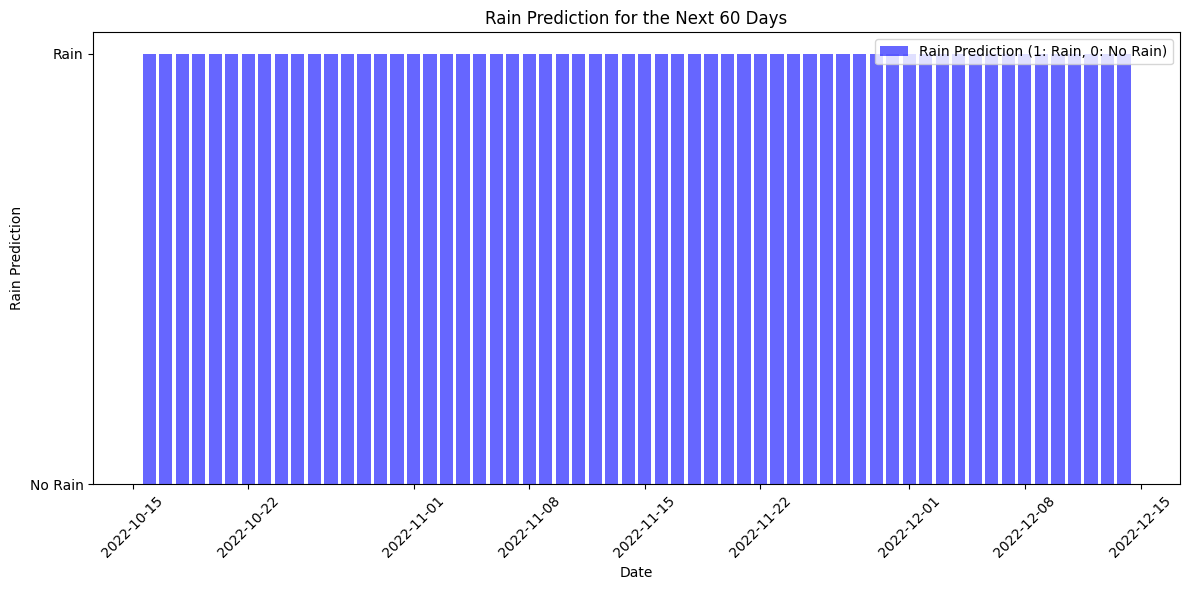

In [45]:
# Forecast future weather (e.g., for the next 60 days)
last_date = data['time'].max()
future_dates = [last_date + timedelta(days=i) for i in range(1, 61)]  # Predict for the next 60 days
future_ordinal = [date.toordinal() for date in future_dates]

# Create a DataFrame for future predictions
future_df = pd.DataFrame({
    'time_ordinal': future_ordinal,
    'cloudcover (%)': np.mean(data['cloudcover (%)']),
    'precipitation (mm)': np.mean(data['precipitation (mm)']),  # Add precipitation average for future predictions
    'windspeed_10m (km/h)': np.mean(data['windspeed_10m (km/h)'])
})

# Make predictions for future rain amounts
future_rain_predictions = model.predict(future_df)

# Convert the predicted rain amounts to binary (1 for rain, 0 for no rain)
future_rain_days = (future_rain_predictions > 0.1).astype(int)  # Assuming a threshold of 0.1 mm for rain

# Visualize only the rain predictions
plt.figure(figsize=(12, 6))
plt.bar(future_dates, future_rain_days, color='blue', alpha=0.6, label="Rain Prediction (1: Rain, 0: No Rain)")
plt.title("Rain Prediction for the Next 60 Days")
plt.xlabel("Date")
plt.ylabel("Rain Prediction")
plt.yticks([0, 1], ['No Rain', 'Rain'])  # Customize y-axis labels
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model for temperature prediction
y_pred_temp = model.predict(X_test)
mae_temp = mean_absolute_error(y_test, y_pred_temp)
mse_temp = mean_squared_error(y_test, y_pred_temp)
rmse_temp = np.sqrt(mse_temp)
r2_temp = r2_score(y_test, y_pred_temp)

print("Temperature Prediction Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_temp:.2f}")
print(f"Mean Squared Error (MSE): {mse_temp:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_temp:.2f}")
print(f"R-squared: {r2_temp:.2f}")

# Evaluate the model for rain prediction
y_pred_rain = model.predict(X_test)
mae_rain = mean_absolute_error(y_test, y_pred)
mse_rain = mean_squared_error(y_test, y_pred)
rmse_rain = np.sqrt(mse_rain)
r2_rain = r2_score(y_test, y_pred)

print("\nRain Prediction Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_rain:.2f}")
print(f"Mean Squared Error (MSE): {mse_rain:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rain:.2f}")
print(f"R-squared: {r2_rain:.2f}")


Temperature Prediction Model Evaluation:
Mean Absolute Error (MAE): 2.44
Mean Squared Error (MSE): 10.84
Root Mean Squared Error (RMSE): 3.29
R-squared: 0.87

Rain Prediction Model Evaluation:
Mean Absolute Error (MAE): 2.44
Mean Squared Error (MSE): 10.84
Root Mean Squared Error (RMSE): 3.29
R-squared: 0.87
